In [1]:
import pandas as pd
import numpy  as np

from math   import sqrt
from typing import List

In [2]:
datafiles = ["data/test.csv"]
             #"data/e-_2500keV_defaults.csv",
             #"data/e-_2500keV_sl1.0mm.csv" , 
             #"data/e-_2500keV_rf0.008.csv" ,
             #"data/e-_2500keV_rf0.001.csv" ]

In [3]:
dfs = [pd.read_csv(f, header=0) for f in datafiles]
df = dfs[0]

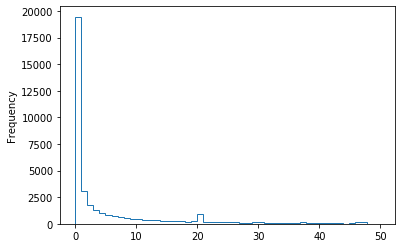

In [4]:
df['step_length'].plot.hist(bins=50, histtype='step')

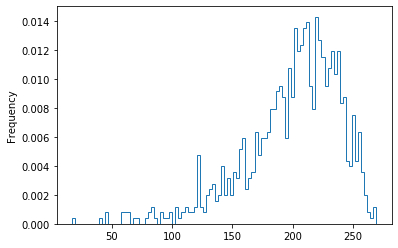

In [5]:
df['track_length'] = df.groupby('event_number')['step_length'].cumsum()
df.groupby('event_number')['track_length'].nth(-1).plot.hist(bins=100, histtype='step', density=True)

In [6]:
dist = pd.DataFrame({'xdist': df.groupby('event_number')['X'].max() - df.groupby('event_number')['X'].min(), 
                     'ydist': df.groupby('event_number')['Y'].max() - df.groupby('event_number')['Y'].min(), 
                     'zdist': df.groupby('event_number')['Y'].max() - df.groupby('event_number')['Y'].min()})

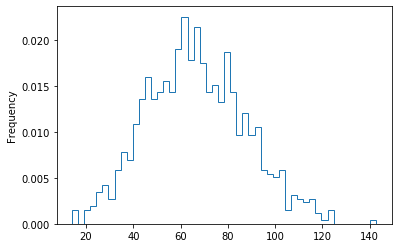

In [7]:
def diagonal(row):
    return sqrt(row['xdist']**2 + row['ydist']**2 + row['zdist']**2)
dist['diag'] = dist.apply(diagonal, axis=1)
dist['diag'].plot.hist(bins=50, histtype='step', density=True)

In [8]:
df.head()

,event_number,step_number,X,Y,Z,UX,UY,UZ,step_length,E_kin,E_dep,track_length
0,0,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,2500.000,0.000,0.000
1,0,1,-0.027,0.009,0.006,-0.936,0.292,0.198,0.029,2499.640,0.360,0.029
2,0,2,-0.439,0.137,0.093,-0.893,-0.129,0.431,0.442,1497.843,1.408,0.471
3,0,3,-14.354,-1.875,6.806,0.353,0.797,-0.490,28.668,1234.405,263.438,29.139
4,0,4,-10.117,7.679,0.929,-0.769,-0.000,-0.640,22.817,1055.234,179.171,51.956


In [13]:
@np.vectorize
def cosine_direction(ux, uy, uz, u0x, u0y, u0z):
    u  = np.array([ux,uy,uz])
    u0 = np.array([u0x,u0y,u0z])
    cosine = np.dot(u, u0)
    return cosine
    
df['cosine'] = df.groupby('event_number').apply(lambda x : cosine_direction(x['UX'], x['UY'], x['UZ'], x.iloc[0]['UX'], x.iloc[0]['UY'], x.iloc[0]['UZ']))

In [14]:
df.head()

,event_number,step_number,X,Y,Z,UX,UY,UZ,step_length,E_kin,E_dep,track_length,cosine
0,0,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,2500.000,0.000,0.000,"[0.9999069999999999, 1.000206, 0.8823489999999..."
1,0,1,-0.027,0.009,0.006,-0.936,0.292,0.198,0.029,2499.640,0.360,0.029,"[1.000782, -0.4092519999999999, 0.225130999999..."
2,0,2,-0.439,0.137,0.093,-0.893,-0.129,0.431,0.442,1497.843,1.408,0.471,"[0.9996460000000001, 0.24442999999999998, 0.18..."
3,0,3,-14.354,-1.875,6.806,0.353,0.797,-0.490,28.668,1234.405,263.438,29.139,"[0.999934, 0.789094, 0.42818199999999995, 0.45..."
4,0,4,-10.117,7.679,0.929,-0.769,-0.000,-0.640,22.817,1055.234,179.171,51.956,"[1.0001380000000002, 0.9536380000000001, -0.63..."
